# División de Ciencias e Ingenierías de la Universidad de Guanajuato
## Fundamentos de procesamiento digital de imágenes
## TAREA : Funciones de filtrado en frecuencia
### Profesor : Dr. Arturo González Vega
### Alumno : Gustavo Magaña López

In [1]:

import copy
import importlib
from typing import Tuple, List, NoReturn

import numpy as np
import scipy.fftpack as F
import scipy.io as io

import cv2
import matplotlib.image as img

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

import skimage
import skimage.morphology
import skimage.filters

from PIL import Image

import scipy.io as io

In [2]:
# Importamos todas nuestras funciones:
import mfilt_funcs as mine
importlib.reload(mine)
from mfilt_funcs import *

In [3]:
def plot_all(image, **kw): 
    """
    """
    
    fig = plt.figure(figsize = (15, 10))
    H = master_kernel(image, **kw)
    filtrada = filtra_maestra(image, **kw)
    
    fig.add_subplot(2, 3, 1)
    plt.imshow(image, cmap = 'gray')
    plt.title('Imagen original', size = 18)
    
    fig.add_subplot(2, 3, 2)
    fft_viz(image)
    plt.title('Transformada de la imagen', size = 18)
    
    fig.add_subplot(2, 3, 3)
    plt.imshow(filtrada, cmap = 'gray')
    plt.title(f'Imagen filtrada.', size = 18)

In [4]:
plt.rcParams['figure.figsize'] = (10, 10)

In [5]:
eps = np.finfo(float).eps
eps.setflags(write=False)

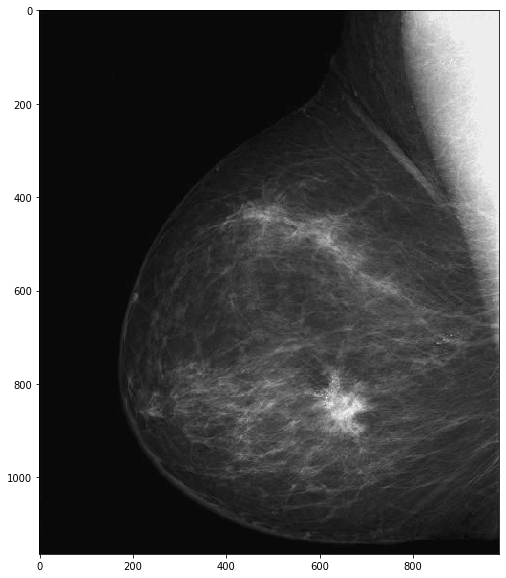

In [6]:
I = img.imread('imagenes/mama.tif')
plt.imshow(I, cmap='gray')

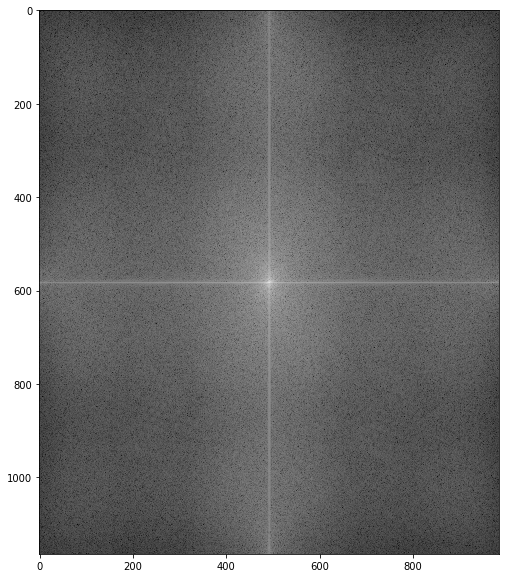

In [7]:
fft_viz(I)

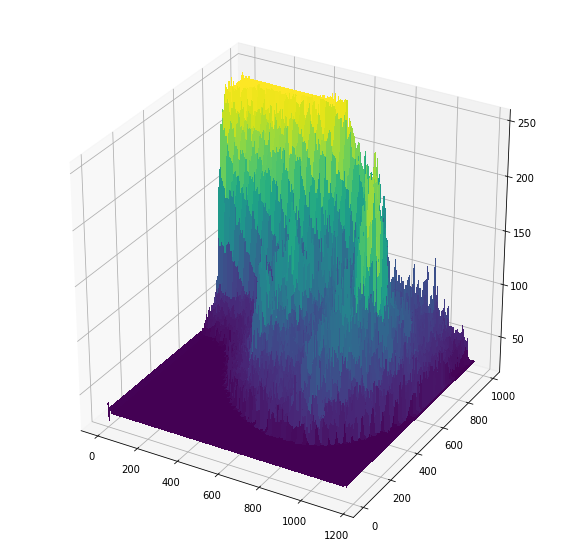

In [8]:
img_surf(I)

In [9]:
x = cv2.imread('imagenes/RadiografiaRuidoCoherente.jpg', 0)

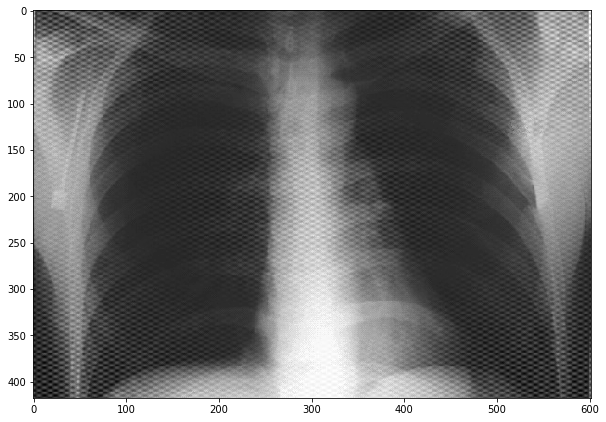

In [10]:
plt.imshow(x, cmap='gray')

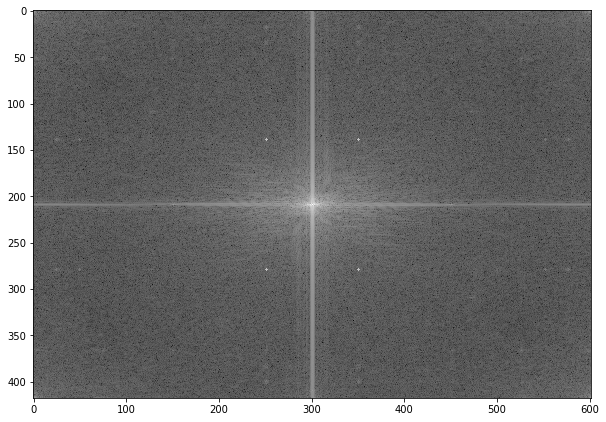

In [11]:
fft_viz(x)

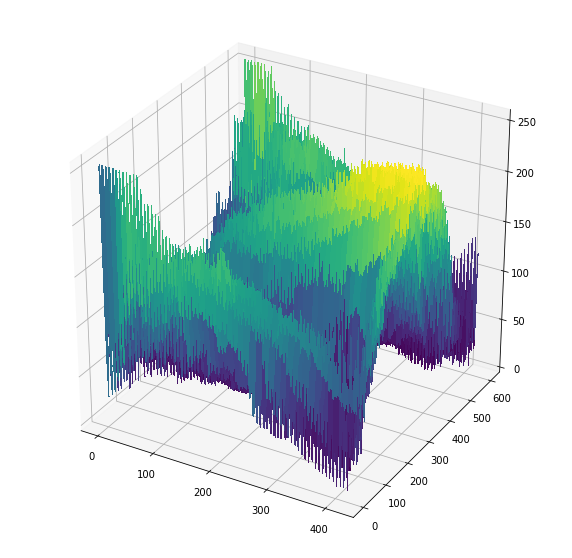

In [12]:
img_surf(x)

### 5.1 Filtro pasa bajos ideal con wc=64,

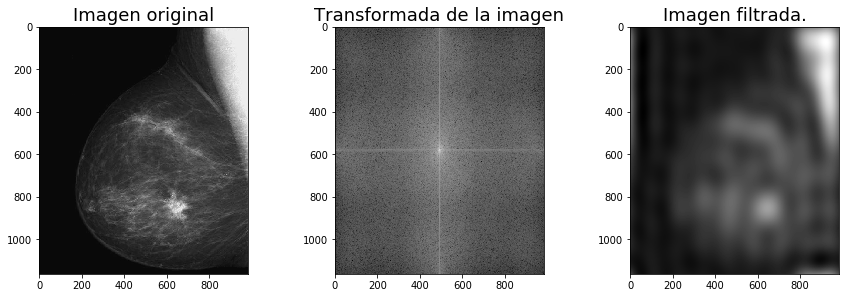

In [13]:
banderas = dict(Do=64, kind='lowpass', form='ideal')
plot_all(I, **banderas)

### 5.2 Filtro pasa bajos butt con wc=64, orden=2

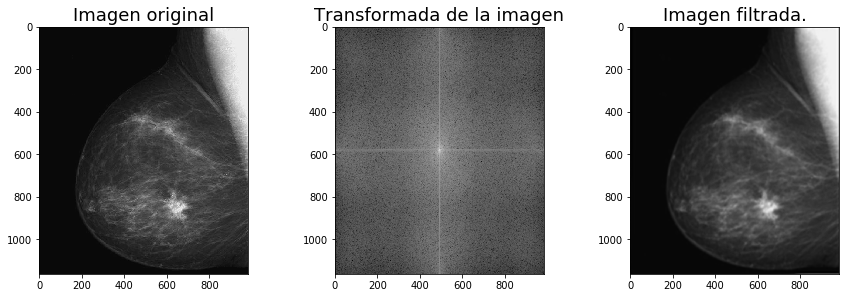

In [14]:
banderas = dict(Do=64, kind='lowpass', form='btw', n=2)
plot_all(I, **banderas)

### 5.3 Filtro pasa bajos gauss con wc=64

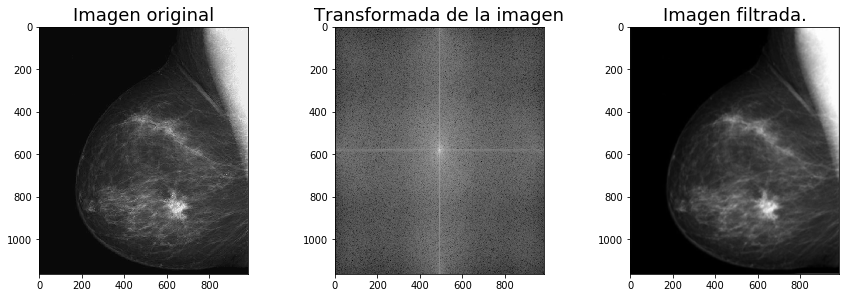

In [15]:
banderas = dict(Do=64, kind='lowpass', form='gauss')
plot_all(I, **banderas)

### 5.4 Filtro pasa altos gauss con wc=64

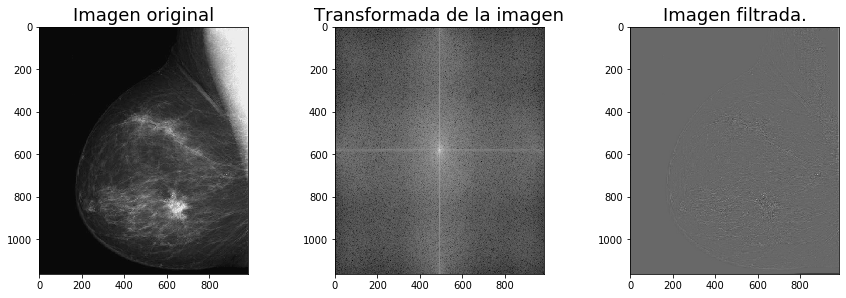

In [16]:
banderas = dict(Do=64, kind='highpass', form='gauss')
plot_all(I, **banderas)

### 5.5 Filtro pasa bandas gauss con wc1=54, wc2=74

/Users/gml/Documents/IX/imagenes/MasterFilter/mfilt_funcs.py:400: RuntimeWarning: divide by zero encountered in true_divide
  H = 1.0 - np.exp(-1.0 * (D - Do**2)**2 / (w**2 * D) )


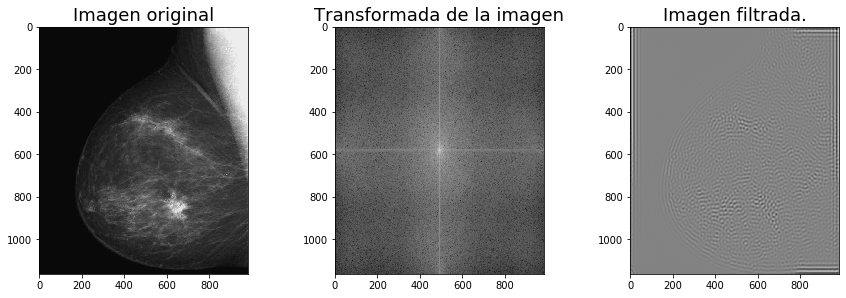

In [17]:
banderas = dict(wc1=54, wc2=74, kind='bandpass', form='gauss')
plot_all(I, **banderas)

### 5.6 Filtro rechazo de bandas gauss con wc1=54, wc2=74

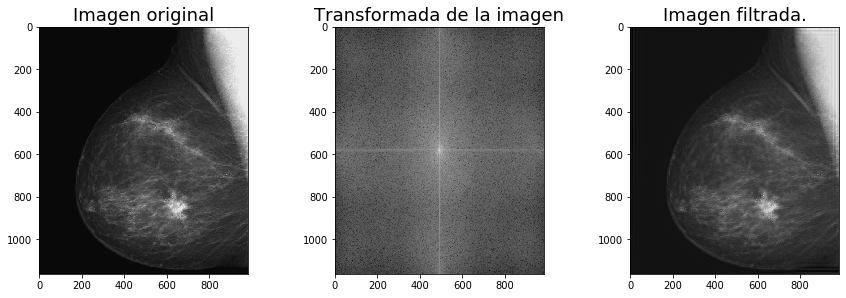

In [18]:
banderas = dict(wc1=54, wc2=74, kind='bandreject', form='gauss')
plot_all(I, **banderas)

In [19]:
cabeza = plt.imread('imagenes/FigP0405(HeadCT_corrupted).tif')

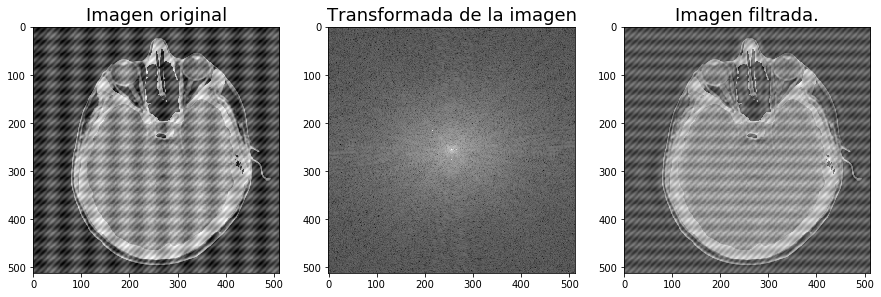

In [20]:
banderas = dict(kind='notchreject', Do=15, center=(0, 25))
plot_all(cabeza, **banderas)

Eliminamos ruido vertical

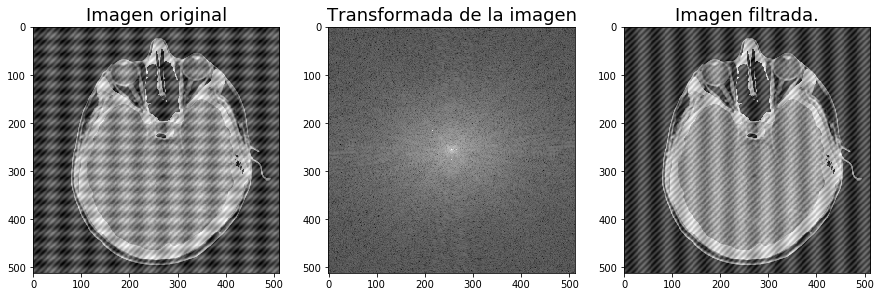

In [22]:
banderas = dict(kind='notchreject', Do=5, center=(20, 0), form='gauss')
plot_all(cabeza, **banderas)

Eliminamos ruido horizontal.

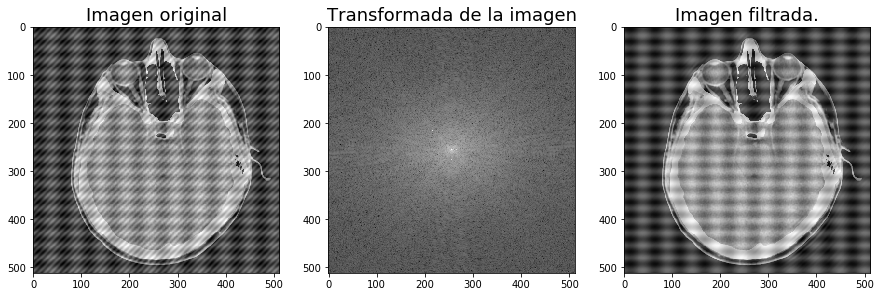

In [24]:
banderas = dict(kind='notchreject', Do=15, center=(46, 46))
plot_all(cabeza, **banderas)

Eliminamos ruido diagonal.

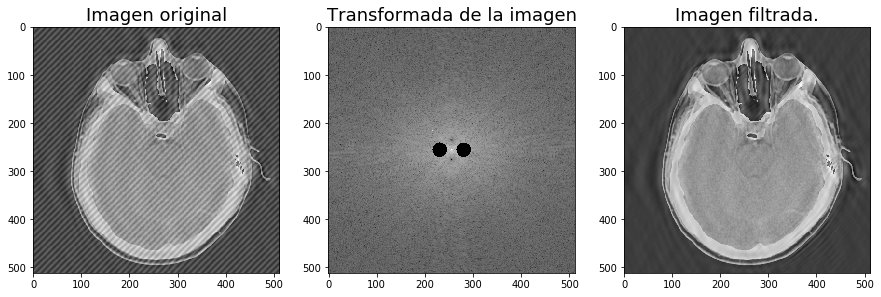

In [25]:
banderas_vertical   = dict(kind='notchreject', Do=15, center=(0, 25))
banderas_horizontal = dict(kind='notchreject', Do=5, center=(20, 0), form='gauss')
banderas_diagonal   = dict(kind='notchreject', Do=15, center=(46, 46))
pre = filtra_maestra(
    filtra_maestra(
        cabeza, **banderas_vertical
    ), **banderas_horizontal
)
plot_all(pre, **banderas_diagonal)


Con un poco de deformaión se logró eliminar el ruido periódico de la imagen.

### Ejemplo de img_surf
Función definida en mfilt_funcs.py, permite representar una imagen (numpy.ndarray) como una superficie.

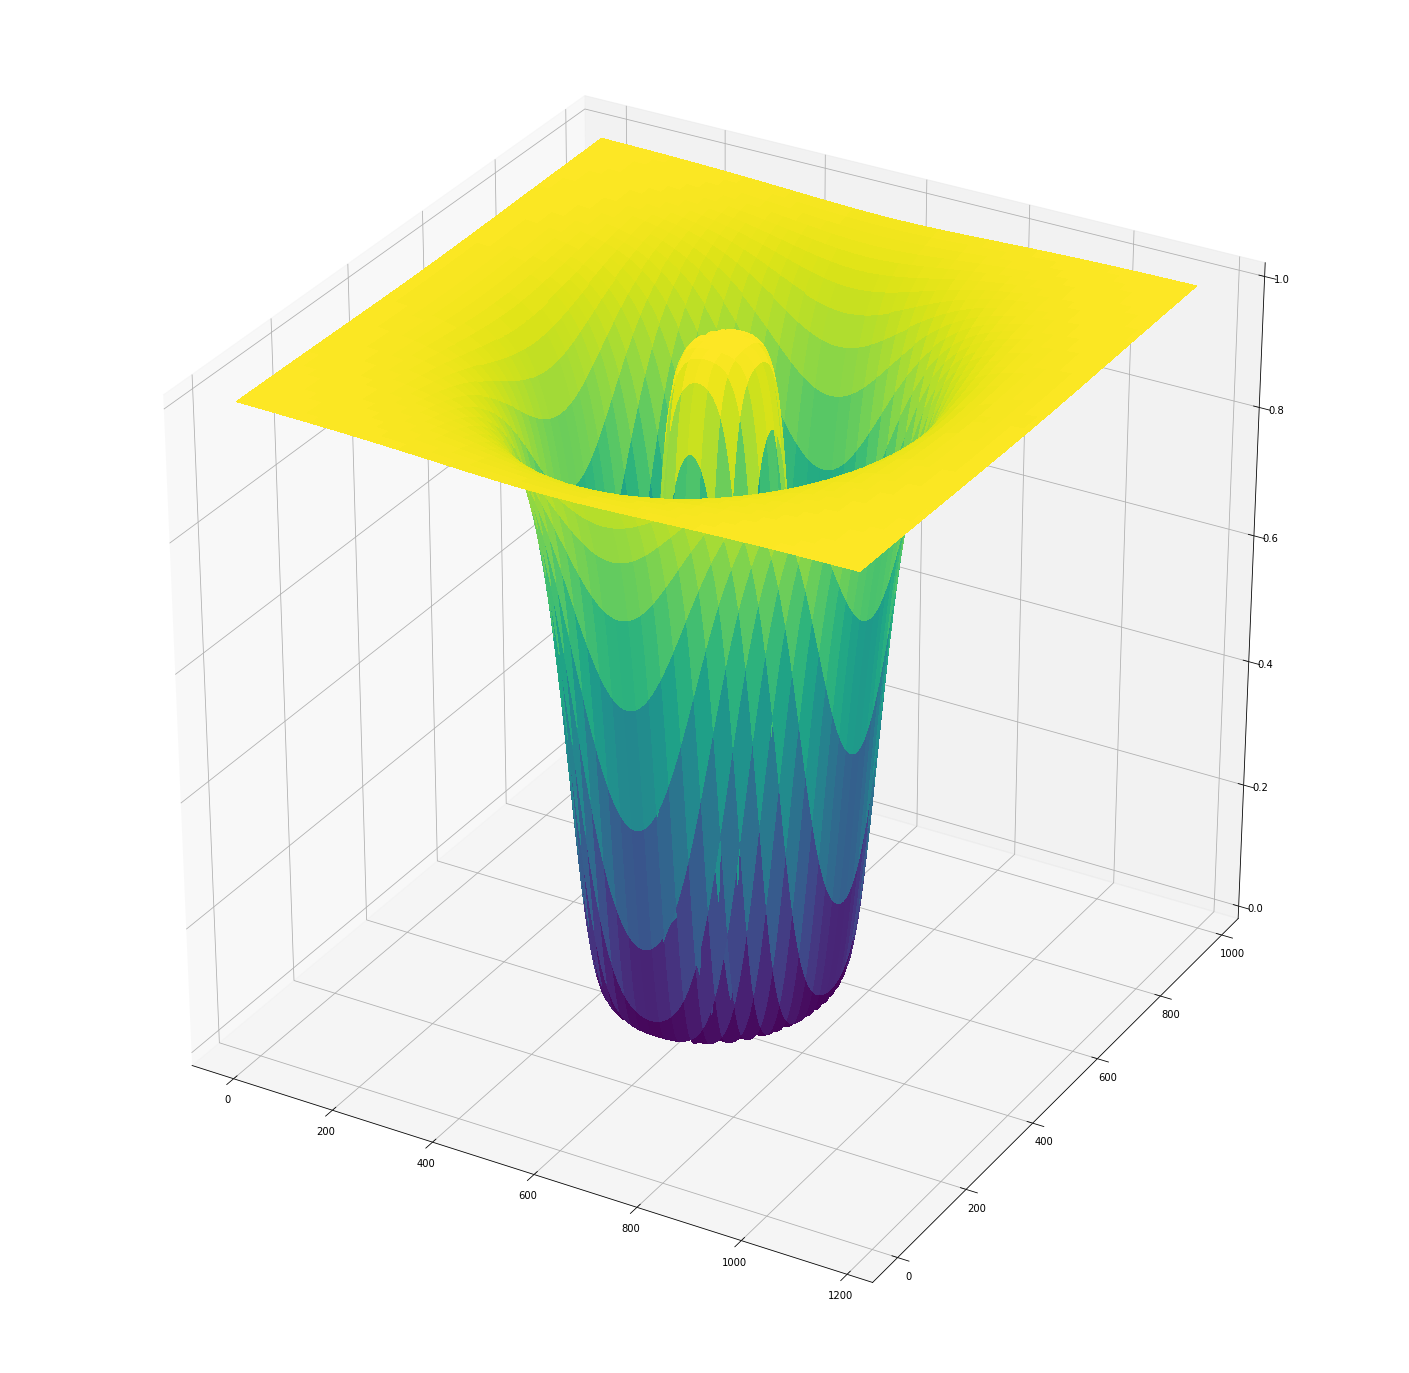

In [73]:
img_surf(master_kernel(I, kind='bandreject', form='btw', wc1=100, wc2=250, n=2))